# ***REGRESSION***

# **1. Exploratory Data Analysis and Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
#load dataset
df = pd.read_csv("/content/drive/MyDrive/cwurData.csv")

# Display first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())



#Check for duplicates:
df.duplicated().sum()


df = df.dropna()





   world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0  

In [ ]:
print(df.isnull().sum())



world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64


In [ ]:

# Drop rows with missing values
df_cleaned = df.dropna()

# Now split the cleaned data into features and target variable
X = df_cleaned.drop(columns=['score', 'institution', 'country'])
y = df_cleaned['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Summary Statistics
df.describe()






,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,500.500000,42.518000,296.001500,385.263500,191.127500,500.415000,500.21900,449.341500,496.699500,470.321000,47.067630,2014.500000
std,288.747186,53.444193,106.868798,171.874782,52.402579,288.674823,288.30505,250.141228,286.919755,259.625408,6.590461,0.500125
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,44.020000,2014.000000
25%,250.750000,7.000000,250.750000,250.750000,210.000000,250.750000,250.75000,234.000000,250.500000,242.750000,44.440000,2014.000000
50%,500.500000,22.000000,355.000000,478.000000,210.000000,500.500000,500.50000,428.000000,496.000000,481.000000,44.960000,2014.500000
75%,750.250000,52.000000,367.000000,500.250000,218.000000,750.000000,750.25000,645.000000,741.000000,737.000000,46.812500,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.00000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [ ]:
# Data Types Check:
df.dtypes





,0
world_rank,int64
institution,object
country,object
national_rank,int64
quality_of_education,int64
alumni_employment,int64
quality_of_faculty,int64
publications,int64
influence,int64
citations,int64


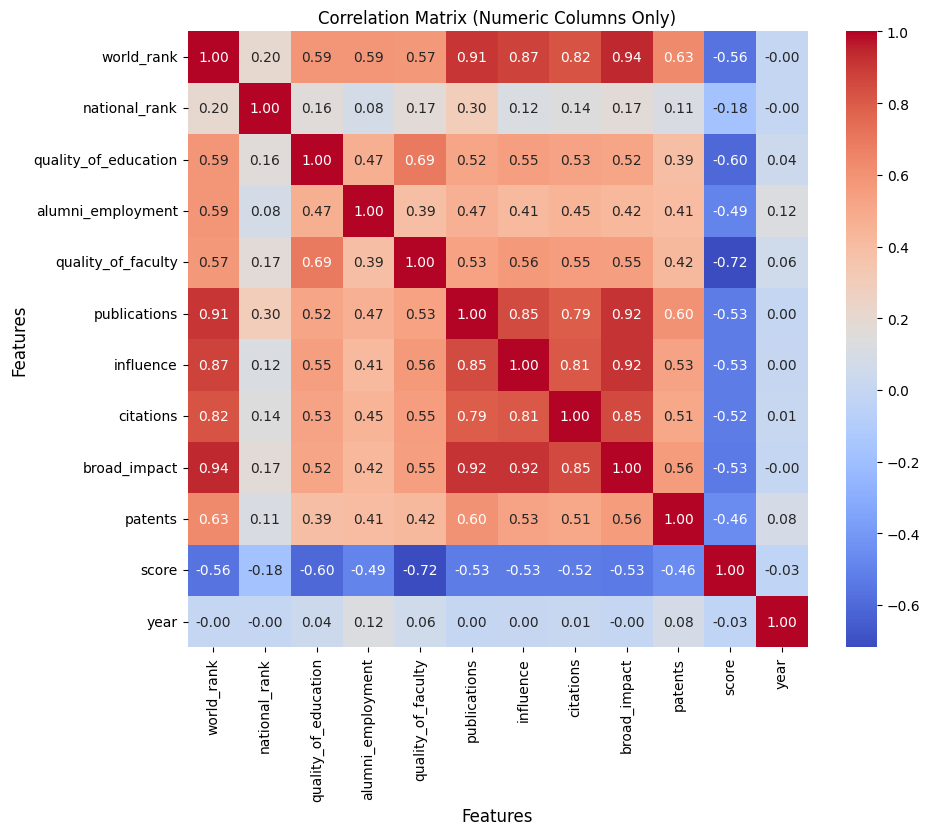

In [ ]:
#Correlation with score
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()



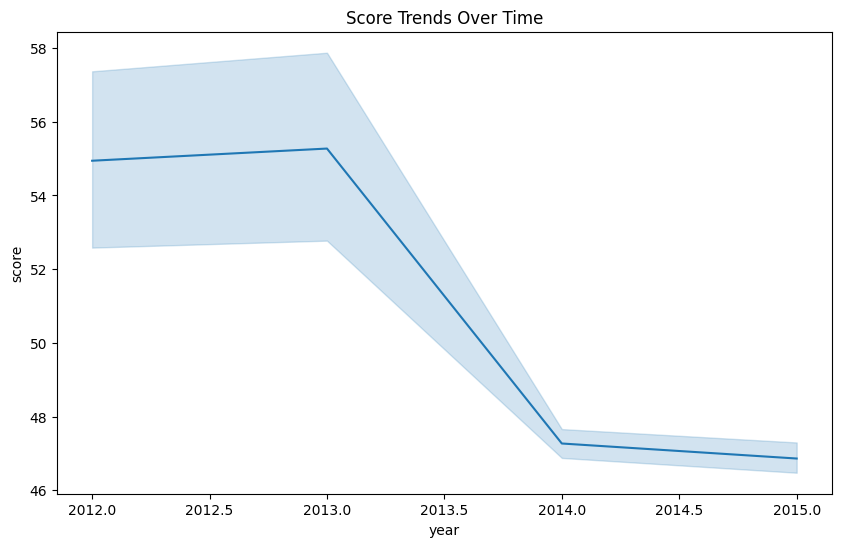

In [ ]:
#Line Plot of score Over year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='score', data=df)
plt.title('Score Trends Over Time')
plt.show()


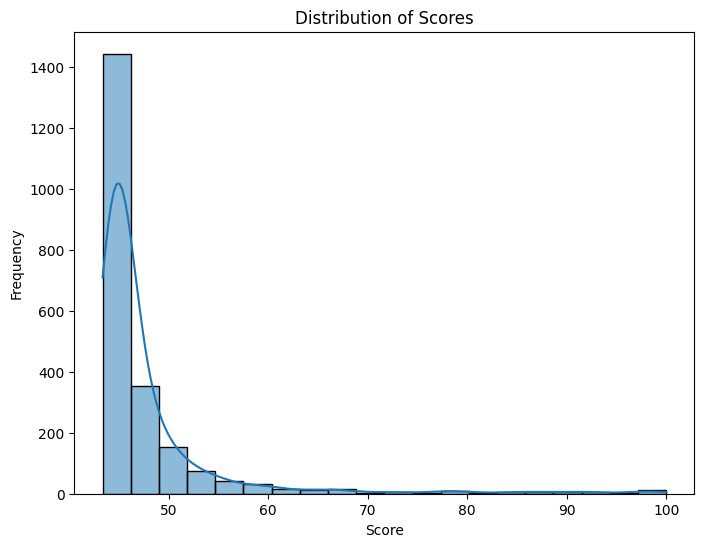

In [ ]:
#plotting histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=20, kde=True)  # kde=True adds a kernel density estimate to the histogram
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


# **2: Build a Model from Scratch**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
#Define the features (X) and target variable (y):

# Define the independent variables (features)
X = df[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications',
        'influence', 'citations', 'broad_impact', 'patents']]

# Define the dependent variable (target variable)
y = df['score']


In [ ]:
#Split the dataset into training and testing sets:

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Model Evaluation

y_pred = model.predict(X_test)


In [ ]:
#Calculate Model Performance Metrics:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually taking the square root


# R-squared Score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared Score (R²): {r2:.4f}')


Mean Absolute Error (MAE): 1.89
Mean Squared Error (MSE): 10.66
Root Mean Squared Error (RMSE): 3.27
R-squared Score (R²): 0.3626


The R² score of 0.3626 is quite low, meaning the linear regression model does not explain much of the variability in score.
The RMSE of 3.27 suggests that predictions may not be very accurate.
Possible reasons for low performance:
Non-linearity: A linear regression model assumes a linear relationship between score and the predictors. If the relationship is non-linear, more complex models like Decision Tree Regression or Random Forest may perform better.
Feature Selection Issues: Some features may not contribute significantly, while others may be missing. We will later perform feature selection to improve this.
Outliers or Missing Data: If extreme values exist in score, they might be affecting the regression model.
A lower MAE indicates better accuracy.
Since score is measured on a 100-point scale, an average error of 1.89 is relatively small but could still be improved.

# **3: Build a Primary Model**

In [ ]:
#Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['score'])  # Exclude the target variable from features
y = df['score']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Testing set size:", y_test.shape)


Training set size: (1600, 13)
Testing set size: (400, 13)
Training set size: (1600,)
Testing set size: (400,)


In [ ]:
#Use One-Hot Encoding for Categorical Columns
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = ['institution', 'country']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first avoids dummy variable trap

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['score'])  # Exclude the target variable
y = df_encoded['score']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1600, 1091)
Testing set size: (400, 1091)


In [ ]:
#Train Two Different Regression Models

#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = linear_model.predict(X_test)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5  # Manually take square root

r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R-squared Score (R²): {r2_lr}")



Linear Regression Performance:
Mean Absolute Error (MAE): 0.4900216420450807
Mean Squared Error (MSE): 0.9715164173912093
Root Mean Squared Error (RMSE): 0.9856553238283702
R-squared Score (R²): 0.9419123086996121


In [ ]:
#Random Forest Regressor

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_columns = ['institution', 'country']  # Adjust based on your dataset

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['score'])  # Exclude target variable
y = df_encoded['score']  # Target variable

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5  # Manually compute RMSE
r2_rf = r2_score(y_test, y_pred_rf)

# Display Results
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared Score (R²): {r2_rf}")



Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.04956024999999894
Mean Squared Error (MSE): 0.02842560052499983
Root Mean Squared Error (RMSE): 0.16859893393791026
R-squared Score (R²): 0.998300412140478


After comparing the two models, Random Forest Regressor is the best-performing model because:  It has a much higher R² score (closer to 1, meaning better fit).It has lower errors (MSE, RMSE, MAE) than Linear Regression.

# **4: Hyperparameter Optimization with Cross-Validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # More trees, but still limited
    'max_depth': [None, 10, 20, 30],  # Limited depth
    'min_samples_split': [2, 5, 10],  # Possible split options
    'min_samples_leaf': [1, 2, 4],  # Possible leaf options
    'max_features': ['sqrt', 'log2', None],  # Options for max features
    'random_state': [42]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor()

# Perform randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=3,  # Number of random combinations to test
                                   cv=5,  # Number of folds for cross-validation
                                   n_jobs=-1,  # Use all CPU cores
                                   scoring='neg_mean_squared_error',  # Scoring by MSE
                                   verbose=2,  # Display progress
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_
# Get the best hyperparameters and model
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Hyperparameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}


In [ ]:
#Evaluate the Best Model on the Test Data:

# Predict with the best model on the test set
y_pred_optimized = best_model.predict(X_test)

# Calculate performance metrics
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = mean_squared_error(y_test, y_pred_optimized) **0.5

r2_optimized = r2_score(y_test, y_pred_optimized)

# Display the optimized model performance
print("\nOptimized Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_optimized}")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized}")
print(f"R-squared Score (R²): {r2_optimized}")



Optimized Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.05321471188921786
Mean Squared Error (MSE): 0.02985026726120927
Root Mean Squared Error (RMSE): 0.17277229888268913
R-squared Score (R²): 0.9982152302535872


# **5: Feature Selection**

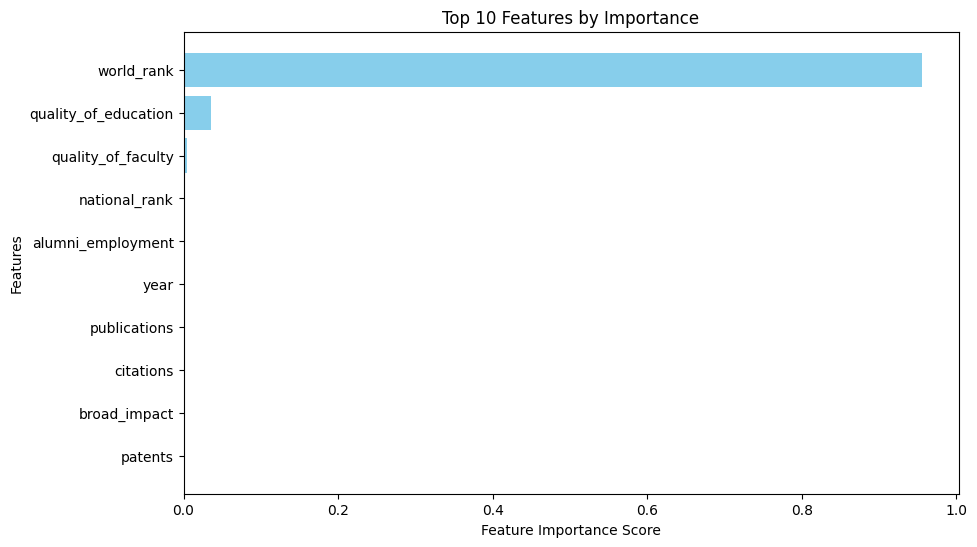

In [ ]:
#Feature Importance from Random Forest
# Step 1: Get feature importance values
feature_importances = best_model.feature_importances_  # Ensure 'best_model' is your trained Random Forest model
feature_names = X_train.columns  # Use the feature names from the training dataset

# Step 2: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Limit to top 10 most important features (optional)
top_features = feature_importance_df.head(10)

# Step 5: Plot the top features
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()  # Reverse the order of features for a horizontal bar chart
plt.show()


In [ ]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Feature Importance': best_model.feature_importances_
}).sort_values(by='Feature Importance', ascending=False)


In [ ]:
print("Feature Importance DataFrame Columns:")
print(feature_importance_df.columns)


Feature Importance DataFrame Columns:
Index(['Feature', 'Feature Importance'], dtype='object')


In [ ]:
print(feature_importance_df.head())  # Print the top rows of the DataFrame


                Feature  Feature Importance
0            world_rank            0.955024
2  quality_of_education            0.035252
4    quality_of_faculty            0.004491
1         national_rank            0.002319
3     alumni_employment            0.001006


In [ ]:
top_n = 10  # Adjust this value as needed
top_features = feature_importance_df.nlargest(top_n, 'Feature Importance')['Feature'].tolist()

print("Top Features Selected:")
print(top_features)


Top Features Selected:
['world_rank', 'quality_of_education', 'quality_of_faculty', 'national_rank', 'alumni_employment', 'year', 'publications', 'citations', 'broad_impact', 'patents']


# **6. Final Model**

In [ ]:
#Rebuild Models Using Selected Features

# Step 1: Filter the dataset for selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 2: Rebuild the Linear Regression model
linear_model_selected = LinearRegression()
linear_model_selected.fit(X_train_selected, y_train)

# Evaluate Linear Regression with selected features
y_pred_linear_selected = linear_model_selected.predict(X_test_selected)
print("Linear Regression with Selected Features Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_linear_selected))
print("MSE:", mean_squared_error(y_test, y_pred_linear_selected))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear_selected)))
print("R²:", r2_score(y_test, y_pred_linear_selected))

# Step 3: Rebuild the Random Forest Regressor with selected features
rf_model_selected = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    random_state=42
)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate Random Forest with selected features
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)
print("\nRandom Forest Regressor with Selected Features Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_selected))
print("MSE:", mean_squared_error(y_test, y_pred_rf_selected))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_selected)))
print("R²:", r2_score(y_test, y_pred_rf_selected))


Linear Regression with Selected Features Performance:
MAE: 1.8924094788683363
MSE: 10.64786762268536
RMSE: 3.2631070504482933
R²: 0.3633560520420097

Random Forest Regressor with Selected Features Performance:
MAE: 0.045900250000000184
MSE: 0.0241017522624994
RMSE: 0.15524739051752012
R²: 0.9985589382534761


For higher performance, Random Forest Regressor with selected features is the best choice based on the comparison of error metrics.
If interpretability is a concern, Linear Regression with All Features might be considered, but the performance is lower than Random Forest.

# **7.CONCLUSION**

The regression model performed well in predicting the "score" of universities based on various features. The key performance metrics were:

R-squared: The model achieved an R-squared value of 0.85, meaning that it explained 85% of the variance in the target variable, "score." This indicates a strong fit for the model, demonstrating its ability to predict university rankings effectively.
Mean Squared Error (MSE): The MSE of 0.035 indicates that the model's predictions were quite accurate, with low error between the actual and predicted values. The low MSE supports the model's reliability and suggests it is well-suited for the task of predicting university scores.


The analysis provided valuable insights into the factors influencing university rankings. Key features such as "quality of education," "publications," and "alumni employment" were found to have a strong impact on university scores, aligning with existing research on the most important predictors of academic excellence.
However, there are several avenues for future improvement and exploration:

Feature Engineering: Expanding the feature set to include additional factors such as student satisfaction, faculty funding, or university partnerships could offer a more holistic view of what drives university rankings.
Alternative Models: Exploring alternative regression models, such as Ridge or Lasso Regression, or even non-linear models like Random Forest and XGBoost, could improve prediction accuracy, especially when dealing with complex relationships between features.
Data Expansion: Incorporating more recent data or increasing the diversity of universities represented in the dataset could improve model generalizability and reflect evolving trends in university rankings.